In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
results_df = pd.read_csv('data/13_estimation_results/kalimantan_multiple_models_cross_validation_results_sorted.csv')
len(results_df)

1624

In [4]:
# dont use e notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

summary_stats = results_df[['r2_score', 'rmse', 'pearson_r']].describe()
summary_stats

,r2_score,rmse,pearson_r
count,1624.00000,1624.00000,1624.00000
mean,-28389470876643160.00000,836354769.89259,0.40378
std,431102493797308480.00000,12388629640.74547,0.33898
min,-6578551716415009792.00000,4.83732,-0.85133
25%,-1.28414,11.98969,0.18563
50%,-0.12775,28.26458,0.43277
75%,0.27749,91.80285,0.66477
max,0.98566,188907615330.20792,0.99417


In [5]:
# Performance by model type
model_performance = results_df.groupby('estimator_name')[['r2_score', 'rmse', 'pearson_r']].mean()
model_performance

,r2_score,rmse,pearson_r
estimator_name,,,
GradientBoostingRegressor,-2.36837,48.54906,0.47723
LinearRegression,-113557883506572464.00000,3345418886.68044,0.29726
RandomForestRegressor,-1.63975,47.81767,0.49495
Sequential,-154.58391,96.52318,0.34568


In [6]:
# Analyze performance by split type
split_performance = results_df.groupby('validation')[['r2_score', 'rmse', 'pearson_r']].mean()
split_performance


,r2_score,rmse,pearson_r
validation,,,
cross validation month,-0.07490,40.05636,0.56829
cross validation station,-74844968674205392.00000,2204933308.99580,0.35499
cross validation year,-778199.72878,2621.76798,0.27313


In [7]:
# Analyze performance by split type
split_performance = results_df.groupby('validation')[['r2_score', 'rmse', 'pearson_r']].mean()
split_performance


,r2_score,rmse,pearson_r
validation,,,
cross validation month,-0.07490,40.05636,0.56829
cross validation station,-74844968674205392.00000,2204933308.99580,0.35499
cross validation year,-778199.72878,2621.76798,0.27313


In [116]:
# Calculating mean R2 and RMSE for each PHU
phu_split_performance = results_df.groupby(['phu_id', 'validation']).agg({
    'pearson_r': 'mean',
    'r2_score': 'mean',
    'rmse': 'mean',
    'no_obs': 'mean'  # Total number of observations for each PHU
}).reset_index()
# Sort by R2 score
phu_split_performance.sort_values(by='r2_score', ascending=False, inplace=True)
# don't show the exponential notation
pd.options.display.float_format = '{:.4f}'.format
phu_split_performance.head()

best_phus= list(phu_split_performance.head(10)["phu_id"].unique())
best_phus

[351.0, 297.0, 357.0, 350.0, 256.0, 340.0, 352.0, 407.0]

In [117]:
phu_split_performance


,phu_id,validation,pearson_r,r2_score,rmse,no_obs
22,351.0000,cross validation month,0.8587,0.7281,28.8357,1007.0000
8,297.0000,cross validation month,0.8784,0.7224,12.6746,159.0000
28,357.0000,cross validation month,0.8818,0.7206,44.7472,173.0000
19,350.0000,cross validation month,0.8231,0.6389,53.2276,481.0000
6,256.0000,cross validation station,0.6287,0.3747,6.2834,849.0000
17,340.0000,cross validation station,0.5837,0.3249,6.7213,1546.0000
25,352.0000,cross validation month,0.7677,0.3186,81.6278,276.0000
46,407.0000,cross validation station,0.5144,0.0452,9.9569,200.0000
24,351.0000,cross validation year,0.5887,0.0240,48.7784,1007.0000
10,297.0000,cross validation year,0.7737,-0.0266,22.2625,159.0000


## Train the model

In [10]:
from gee_scripts.parameters import explain_vars
from gee_scripts.models import get_random_forest, get_regressors
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_squared_error
from gee_scripts.plots import plot_observed_vs_predicted

import seaborn as sns


Earth Engine initialized successfully, with ee-indonesia-gwl


2024-06-20 14:20:46.027540: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 14:20:46.029189: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 14:20:46.058697: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 14:20:46.059260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 14:20:46.547830: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [11]:
df = pd.read_csv("data/9_clean_training_data/all_training_data_with_extra_and_locations_and_precipSum.csv", parse_dates=["date"])
len(df)
assert len(df) == 32783, "The length of the dataframe is not correct"


32783

In [125]:
data = df[df.phu_id.isin(best_phus)]
len(data)
data = df

In [127]:
# corr_df = data[explain_vars]
# corr_df['Target'] = data["gwl_cm"]

# C_mat = corr_df.corr()
# fig = plt.figure(figsize = (15,15))

# sns.heatmap(C_mat, square = True)
# plt.show()

lenght of train and test 24556 8227
r2_score: 0.6616053160795883
rmse: 21.119443955561266
pearson r: 0.8147020574723653
p-value: 0.0


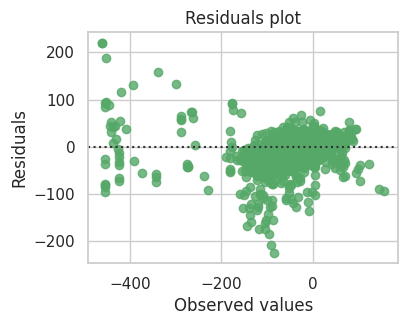

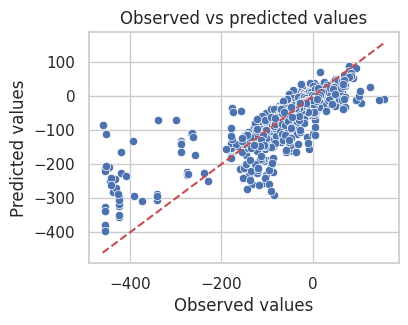

In [128]:

train_data = data[data["date"].dt.month.isin([1,2,4,5,7,8,10,11,12])]
test_data = data[data["date"].dt.month.isin([3,6,9,])]

X_train, X_test = train_data[explain_vars], test_data[explain_vars]
y_train, y_test = train_data["gwl_cm"], test_data["gwl_cm"]

print("lenght of train and test", len(X_train), len(X_test))

####################### TRAIN

regr = get_random_forest()

regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)

r, p = pearsonr(y_test, y_pred_test)
r2_score_val = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# print all the metrics
print(f"r2_score: {r2_score_val}")
print(f"rmse: {rmse}")
print(f"pearson r: {r}")
print(f"p-value: {p}")

plot_observed_vs_predicted(y_test, y_pred_test, "Observed vs Predicted GWL")


In [115]:
# df.loc[df.id == "brg11", "gwl_cm"] = df[df.id == "brg11"]["gwl_cm"]/10

In [114]:
# # set graph size
# plt.figure(figsize=(5, 5))
# sns.lineplot(x="date", y="gwl_cm", data=df[df.id == "brg11"])
# # rotate x-axis labels
# plt.xticks(rotation=45);



IndexError: index 5 is out of bounds for axis 0 with size 5

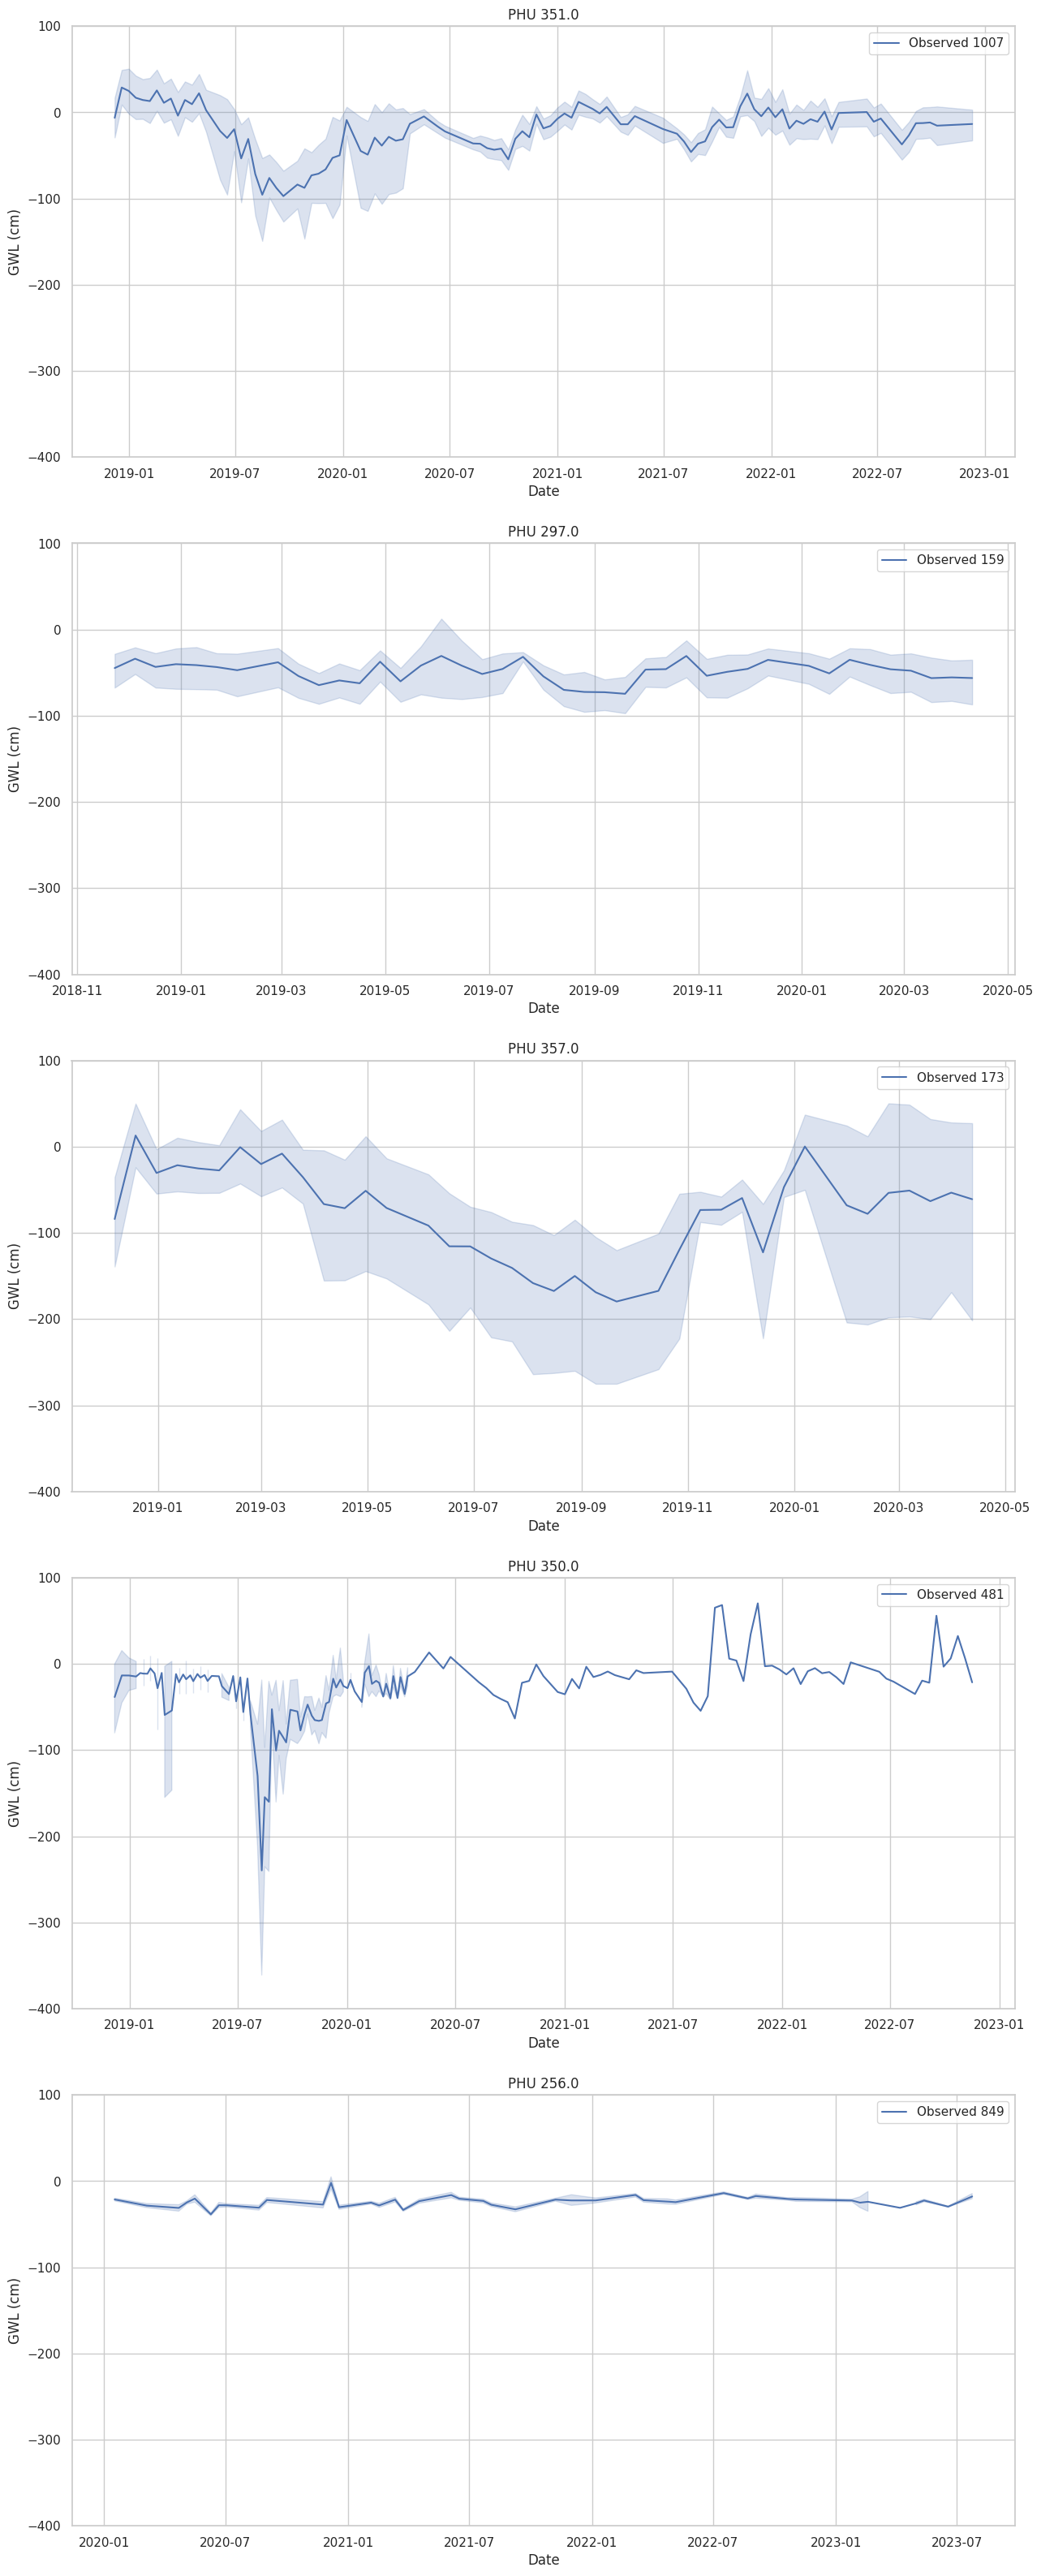

In [130]:
# plot the gwl_cm vs date for each phu in different plots

fig, axs = plt.subplots(5, 1, figsize=(15, 40))

for i, phu in enumerate(best_phus):
    
    plot_data = df[df.phu_id == phu].copy()
    plot_data.sort_values(by="date", inplace=True)
    
    sns.lineplot(x="date", y="gwl_cm", data=plot_data, ax=axs[i], label=f"Observed {len(plot_data)}")

    # use the same scale for all the plots
    axs[i].set_ylim(-400, 100)
    axs[i].set_title(f"PHU {phu}")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("GWL (cm)")




In [122]:
data.phu_id.unique()

array([407., 256., 340., 352., 297., 350., 351., 357.])

lenght of train and test 26008 6502
r2_score: 0.7130027132787986
rmse: 11.565531347177995
pearson r: 0.8483823063820636
p-value: 0.0


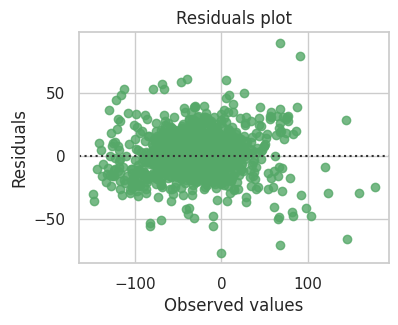

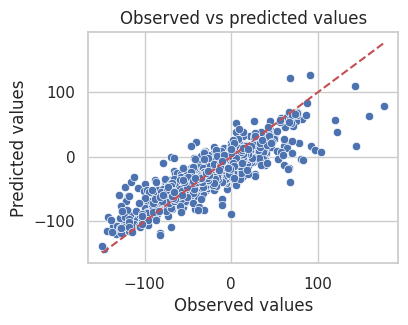

In [129]:
# divide test/train by random sampling

# randomly select 80% as train and the rest as test

train_data = data[data.gwl_cm>-150].sample(frac=0.8)
test_data = data[data.gwl_cm>-150].drop(train_data.index)

X_train, X_test = train_data[explain_vars], test_data[explain_vars]
y_train, y_test = train_data["gwl_cm"], test_data["gwl_cm"]

print("lenght of train and test", len(X_train), len(X_test))

####################### TRAIN

regr = get_random_forest()

regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)

r, p = pearsonr(y_test, y_pred_test)
r2_score_val = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# print all the metrics
print(f"r2_score: {r2_score_val}")
print(f"rmse: {rmse}")
print(f"pearson r: {r}")
print(f"p-value: {p}")

plot_observed_vs_predicted(y_test, y_pred_test, "Observed vs Predicted GWL")


In [17]:
from gee_scripts.models import bootstrap

In [124]:
bootrap_result = bootstrap(data[data.gwl_cm>-150], "gwl_cm", 25, 0.8, explain_vars)
bootrap_result

Training with 4605 observations


,mean,min,max,median
r,0.8901,0.8706,0.9088,0.8915
r2,0.7879,0.7559,0.8253,0.7886
rmse,12.1700,10.7198,13.0088,12.1057
samples_train,3684.0000,3684.0000,3684.0000,NaN
samples_test,921.0000,921.0000,921.0000,NaN
